In [13]:
#install.packages('corrplot')
#install.packages('cowplot')
#install.packages('mltools')
#install.packages('ISLR')
#install.packages('DMwR')
#install.packages('Metrics')

# To import data in datafram
library(data.table)
# To make used of pipelining process and cleaning of data and descriptive analysis of data
library(dplyr)
# To visualize the data
library(ggplot2)
# To make a correlation plot
library(corrplot)
# To tune the model, and for feature selection
library(caret)
# To clean the data
library(tidyverse)
# To create a correlation heatmap
library(cowplot)
# To determine metrics of model
library(Metrics)

In [14]:
# Loading the data
train = read.csv("../input/Train.csv")

In [15]:
# Understanding the data
dim(train)
head(train)
summary(train)
glimpse(train)
names(train)

[1] 8523   12

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


 Item_Identifier  Item_Weight     Item_Fat_Content Item_Visibility  
 FDG33  :  10    Min.   : 4.555   LF     : 316     Min.   :0.00000  
 FDW13  :  10    1st Qu.: 8.774   low fat: 112     1st Qu.:0.02699  
 DRE49  :   9    Median :12.600   Low Fat:5089     Median :0.05393  
 DRN47  :   9    Mean   :12.858   reg    : 117     Mean   :0.06613  
 FDD38  :   9    3rd Qu.:16.850   Regular:2889     3rd Qu.:0.09459  
 FDF52  :   9    Max.   :21.350                    Max.   :0.32839  
 (Other):8467    NA's   :1463                                       
                 Item_Type       Item_MRP      Outlet_Identifier
 Fruits and Vegetables:1232   Min.   : 31.29   OUT027 : 935     
 Snack Foods          :1200   1st Qu.: 93.83   OUT013 : 932     
 Household            : 910   Median :143.01   OUT035 : 930     
 Frozen Foods         : 856   Mean   :140.99   OUT046 : 930     
 Dairy                : 682   3rd Qu.:185.64   OUT049 : 930     
 Canned               : 649   Max.   :266.89   OUT045 : 92

Observations: 8,523
Variables: 12
$ Item_Identifier           <fct> FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, F…
$ Item_Weight               <dbl> 9.300, 5.920, 17.500, 19.200, 8.930, 10.395…
$ Item_Fat_Content          <fct> Low Fat, Regular, Low Fat, Regular, Low Fat…
$ Item_Visibility           <dbl> 0.016047301, 0.019278216, 0.016760075, 0.00…
$ Item_Type                 <fct> Dairy, Soft Drinks, Meat, Fruits and Vegeta…
$ Item_MRP                  <dbl> 249.8092, 48.2692, 141.6180, 182.0950, 53.8…
$ Outlet_Identifier         <fct> OUT049, OUT018, OUT049, OUT010, OUT013, OUT…
$ Outlet_Establishment_Year <int> 1999, 2009, 1999, 1998, 1987, 2009, 1987, 1…
$ Outlet_Size               <fct> Medium, Medium, Medium, , High, Medium, Hig…
$ Outlet_Location_Type      <fct> Tier 1, Tier 3, Tier 1, Tier 3, Tier 3, Tie…
$ Outlet_Type               <fct> Supermarket Type1, Supermarket Type2, Super…
$ Item_Outlet_Sales         <dbl> 3735.1380, 443.4228, 2097.2700, 732.3800, 9…


[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [16]:
# Replacing Values
train <- train %>% mutate(Item_Fat_Content = replace(Item_Fat_Content,Item_Fat_Content == "LF","Low Fat"))
train <- train %>% mutate(Item_Fat_Content = replace(Item_Fat_Content,Item_Fat_Content == "low fat","Low Fat"))
train <- train %>% mutate(Item_Fat_Content = replace(Item_Fat_Content,Item_Fat_Content == "reg","Regular"))

In [17]:
#Replacing missing values in Outlet Size with "Small" as both have similar distribution with Outlet Sales
train$Outlet_Size[train$Outlet_Size==''] <- "Small"

In [18]:
# Missing Value Treatment
missing_values <-  summarise_all(train, funs(missing=sum(is.na(.))))

loc_na <-  which(is.na(train$Item_Weight))

for(i in loc_na){
  identifier <-  train$Item_Identifier[i]
  train$Item_Weight[i] <-  mean(train$Item_Weight[train$Item_Identifier==identifier], na.rm=T)
}

In [19]:
# To replace zero with mean
zero_index <- which(train$Item_Visibility==0)
for(i in zero_index){
  item <- train$Item_Identifier[i]
  train$Item_Visibility[i]=mean(train$Item_Visibility[train$Item_Identifier==item],na.rm=T)
}

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

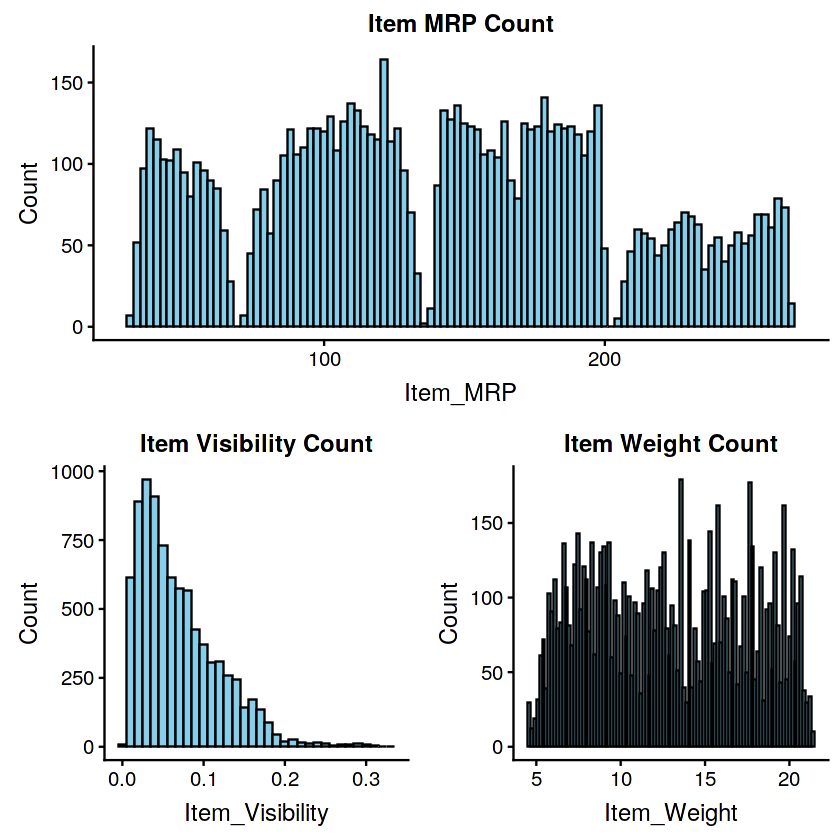

In [20]:
# Continuous Data Analysis (Univariate) Creatin Histograms

h1 <-  ggplot(train,aes(Item_Visibility))+
  geom_histogram(bins = 100,binwidth=0.01,color='Black',fill='Sky Blue') +
  ylab('Count') +
  ggtitle("Item Visibility Count") +
  theme(plot.title = element_text(hjust = 0.5))

h2 <- ggplot(train,aes(Item_Weight)) +
  geom_histogram(bins = 100,color='Black',fill='Sky Blue') +
  ylab('Count') + 
  ggtitle("Item Weight Count") + 
  theme(plot.title = element_text(hjust = 0.5))

h3 <- ggplot(train,aes(Item_MRP)) + 
  geom_histogram(bins = 100,color='Black',fill='Sky Blue') + 
  ylab('Count') + 
  ggtitle("Item MRP Count") + 
  theme(plot.title = element_text(hjust = 0.5))

# Creating a canvas and displaying the plots
second_row_2 <-  plot_grid(h1, h2, ncol = 2)
plot_grid(h3, second_row_2, nrow = 2)

Warning message:
“Removed 4 rows containing missing values (geom_point).”

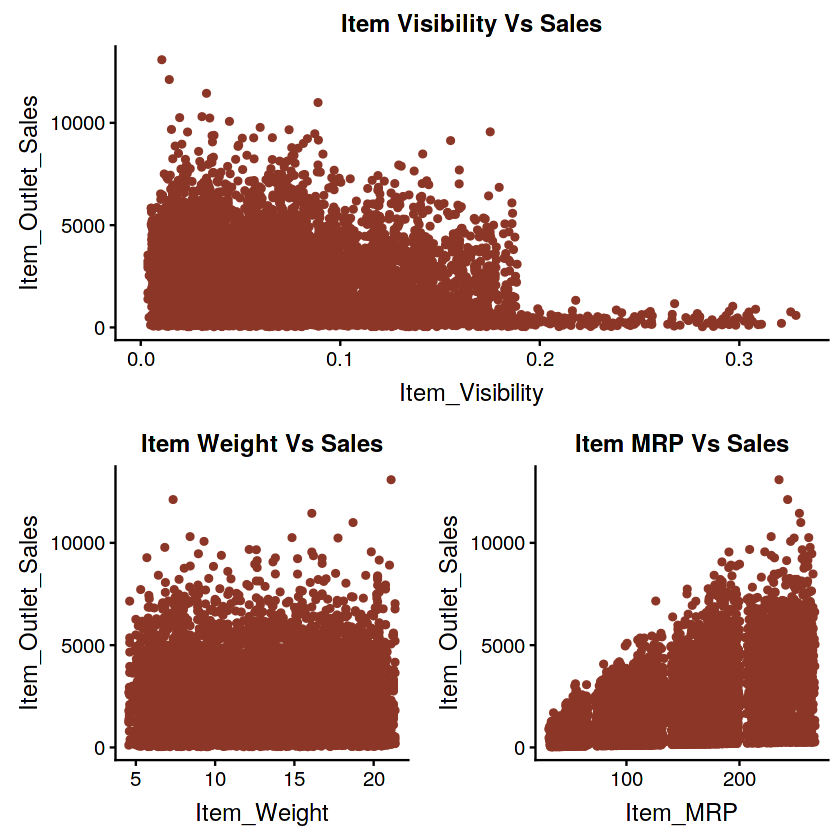

In [21]:
# Bivariate analysis of continuous variables

# Item_Weight vs Item_Outlet_Sales (Scatter Plot)
p1 <-  train %>% ggplot(aes(Item_Weight, Item_Outlet_Sales)) + 
  geom_point(color='tomato4') +
  ggtitle("Item Weight Vs Sales") +
  theme(plot.title = element_text(hjust = 0.5))

# Item_MRP vs Item_Outlet_Sales (Scatter Plot)
p2 <-  train %>% ggplot(aes(Item_MRP, Item_Outlet_Sales)) + 
  geom_point(color='tomato4') +
  ggtitle("Item MRP Vs Sales") +
  theme(plot.title = element_text(hjust = 0.5))

# Item_Visibility vs Item_Outlet_Sales (Scatter Plot)
p3 <-  train %>% ggplot(aes(Item_Visibility, Item_Outlet_Sales)) + 
  geom_point(color='tomato4') + 
  ggtitle("Item Visibility Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

second_row_2 <-  plot_grid(p1, p2, ncol = 2)
plot_grid(p3, second_row_2, nrow = 2)

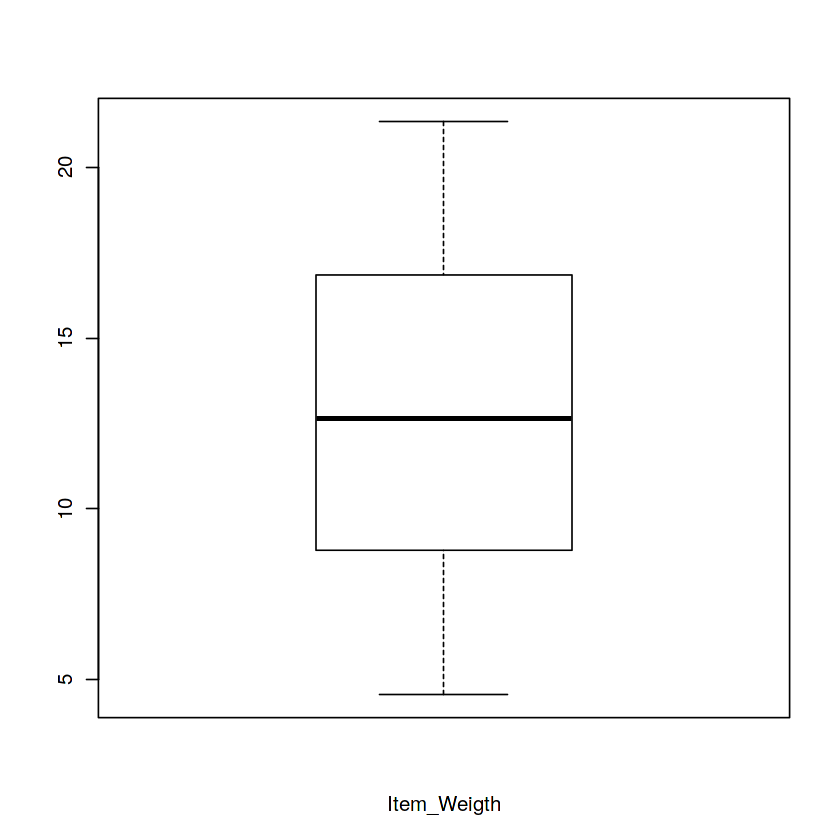

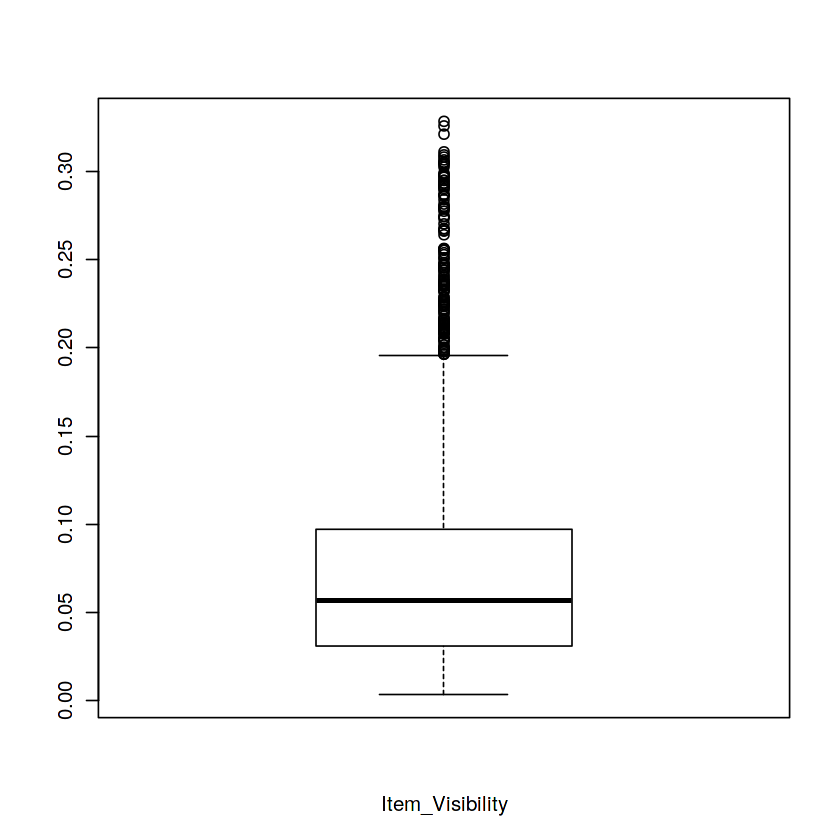

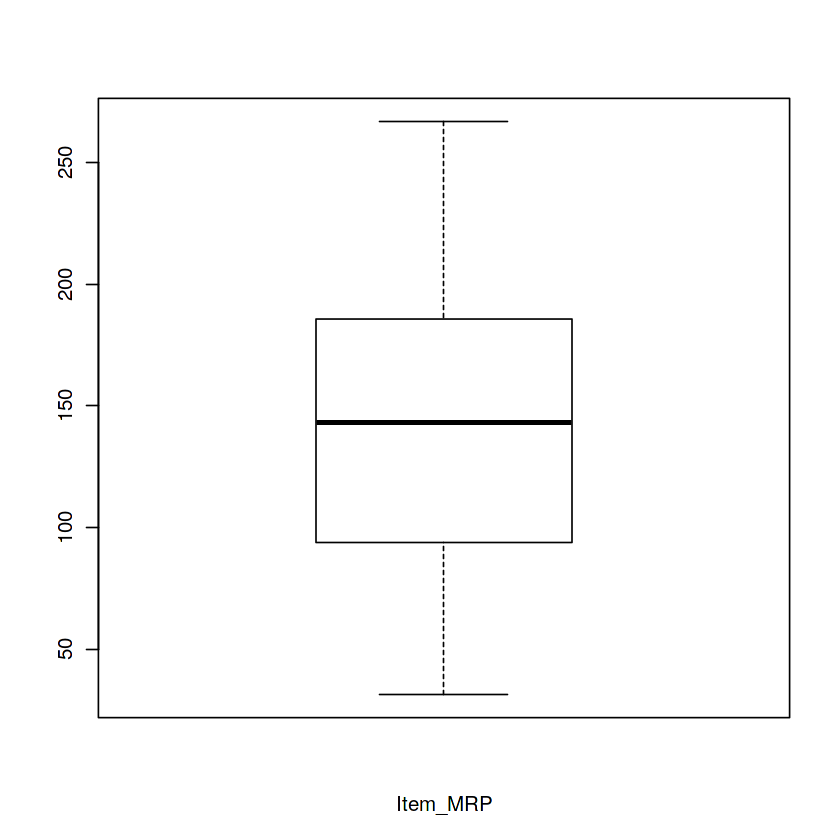

In [22]:
# Outlier Detection using IQR Method in continuous variables

# Boxplot for each variable
boxplot(train$Item_Weight,xlab='Item_Weigth')
boxplot(train$Item_Visibility,xlab='Item_Visibility')
boxplot(train$Item_MRP,xlab='Item_MRP')

Q1_visibility <-  quantile(train$Item_Visibility)[2]
Q3_visibility <-  quantile(train$Item_Visibility)[4]
IQR_visibility <-  Q3_visibility - Q1_visibility

lower_visibility <-  Q1_visibility - 1.5 * IQR_visibility
upper_visibility <-  Q3_visibility + 1.5 * IQR_visibility

In [23]:
# Categorical Data Analysis

# Creating a data table for each categorical which determines Mean and Count of each unique values

# Item_Fat_Content
fat_bysales <-  train %>% group_by(Item_Fat_Content) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))

fat_bysales

Item_Fat_Content,Count,Sales_Mean
<fct>,<int>,<dbl>
Low Fat,5517,2157.712
Regular,3006,2224.561


In [24]:
# Item_Type
type_bysales <-  train %>% group_by(Item_Type) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
type_bysales

Item_Type,Count,Sales_Mean
<fct>,<int>,<dbl>
Baking Goods,648,1952.971
Breads,251,2204.132
Breakfast,110,2111.809
Canned,649,2225.195
Dairy,682,2232.543
Frozen Foods,856,2132.868
Fruits and Vegetables,1232,2289.010
Hard Drinks,214,2139.222
Health and Hygiene,520,2010.000


In [25]:
# Outlet_Size
outletsize_bysales = train %>% group_by(Outlet_Size) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
outletsize_bysales

Outlet_Size,Count,Sales_Mean
<fct>,<int>,<dbl>
High,932,2298.995
Medium,2793,2681.604
Small,4798,1867.183


In [26]:
# Outlet_Location_Type
outletlocation_bysales = train %>% group_by(Outlet_Location_Type) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
outletlocation_bysales

Outlet_Location_Type,Count,Sales_Mean
<fct>,<int>,<dbl>
Tier 1,2388,1876.909
Tier 2,2785,2323.991
Tier 3,3350,2279.628


In [27]:
# Outlet_Type
outlettype_bysales = train %>% group_by(Outlet_Type) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
outlettype_bysales

Outlet_Type,Count,Sales_Mean
<fct>,<int>,<dbl>
Grocery Store,1083,339.8285
Supermarket Type1,5577,2316.1811
Supermarket Type2,928,1995.4987
Supermarket Type3,935,3694.0386


In [28]:
# Outlet_Identifier
outletid_bysales = train %>% group_by(Outlet_Identifier) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
outletid_bysales

Outlet_Identifier,Count,Sales_Mean
<fct>,<int>,<dbl>
OUT010,555,339.3517
OUT013,932,2298.9953
OUT017,926,2340.6753
OUT018,928,1995.4987
OUT019,528,340.3297
OUT027,935,3694.0386
OUT035,930,2438.8419
OUT045,929,2192.3848
OUT046,930,2277.8443


In [29]:
# Outlet_Establishment_Year
outletyear_bysales = train %>% group_by(Outlet_Establishment_Year) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Count = n(),Sales_Mean = mean))
outletyear_bysales

Outlet_Establishment_Year,Count,Sales_Mean
<int>,<int>,<dbl>
1985,1463,2483.6775
1987,932,2298.9953
1997,930,2277.8443
1998,555,339.3517
1999,930,2348.3546
2002,929,2192.3848
2004,930,2438.8419
2007,926,2340.6753
2009,928,1995.4987


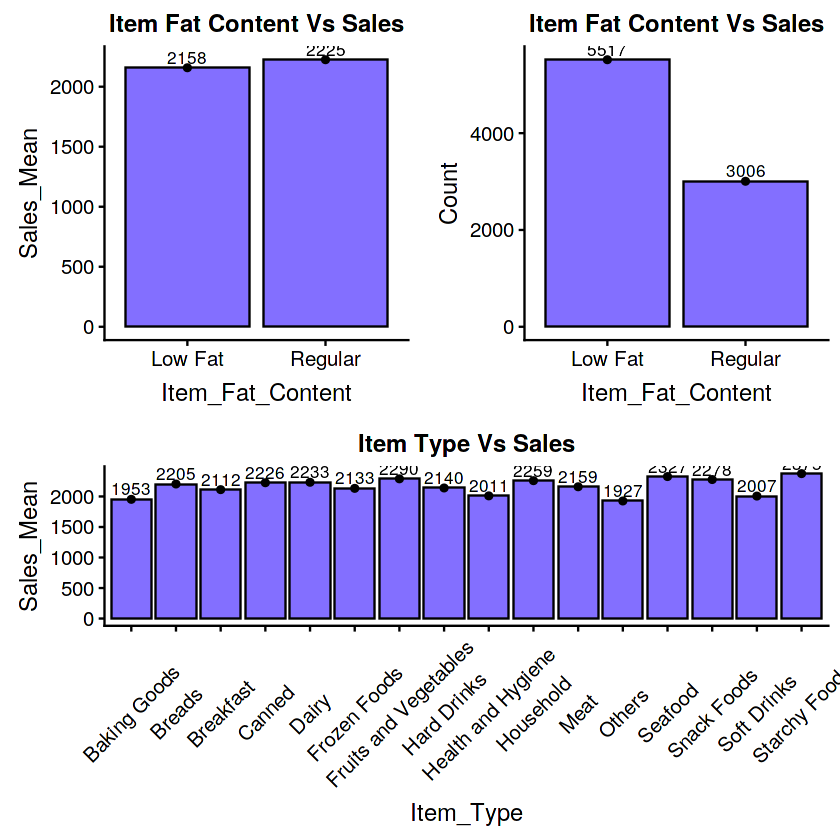

In [31]:
# Bivariate analysis of categorical variables

# Visualizing each categorical data table with mean and count seperately

# Visualing Item_Fat_Content with Mean of Item_Outlet_Sales
j1 <- ggplot(fat_bysales, aes(Item_Fat_Content, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Item Fat Content Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

# Visualing Item_Fat_Content with Count of Item_Outlet_Sales
j2 <- ggplot(fat_bysales, aes(Item_Fat_Content, Count)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Count)), vjust=-0.3, size=3.5) + 
  ggtitle("Item Fat Content Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

# Visualing Item_Type with Mean of Item_Outlet_Sales
j3 <- ggplot(type_bysales, aes(Item_Type, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Item Type Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5))

graph <- plot_grid(j1,j2,ncol=2)
plot_grid(graph,j3,nrow=2)

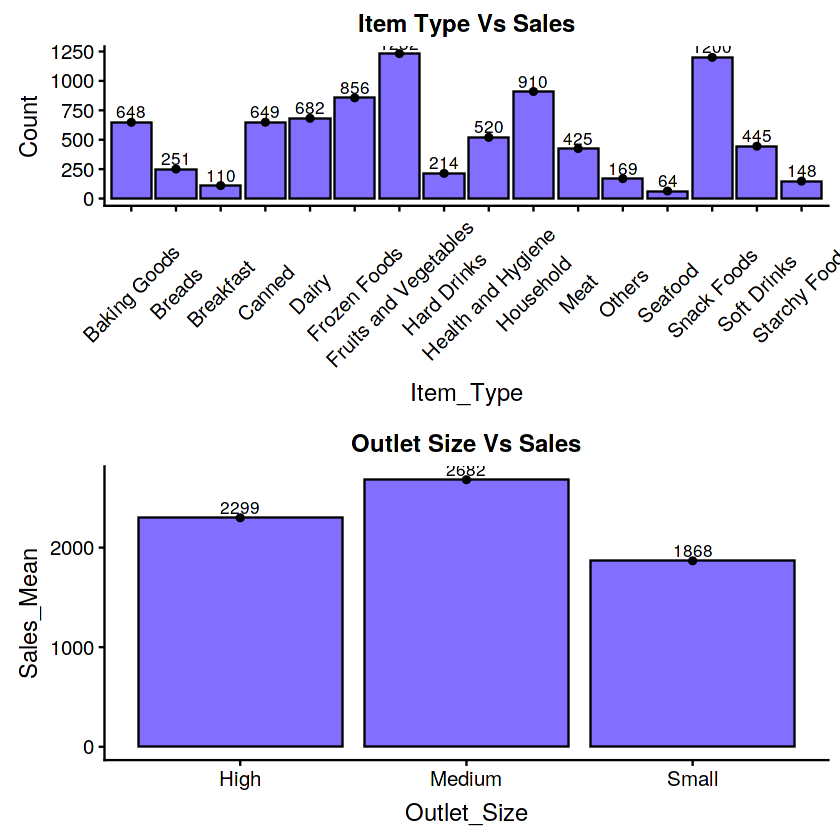

In [33]:
# Visualing Item_Type with Count of Item_Outlet_Sales
j4 <- ggplot(type_bysales, aes(Item_Type, Count)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Count)), vjust=-0.3, size=3.5) + 
  ggtitle("Item Type Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5))


# Visualing Outlet_Size with Mean of Item_Outlet_Sales
j5 <- ggplot(outletsize_bysales, aes(Outlet_Size, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Outlet Size Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

plot_grid(j4,j5,nrow=2)

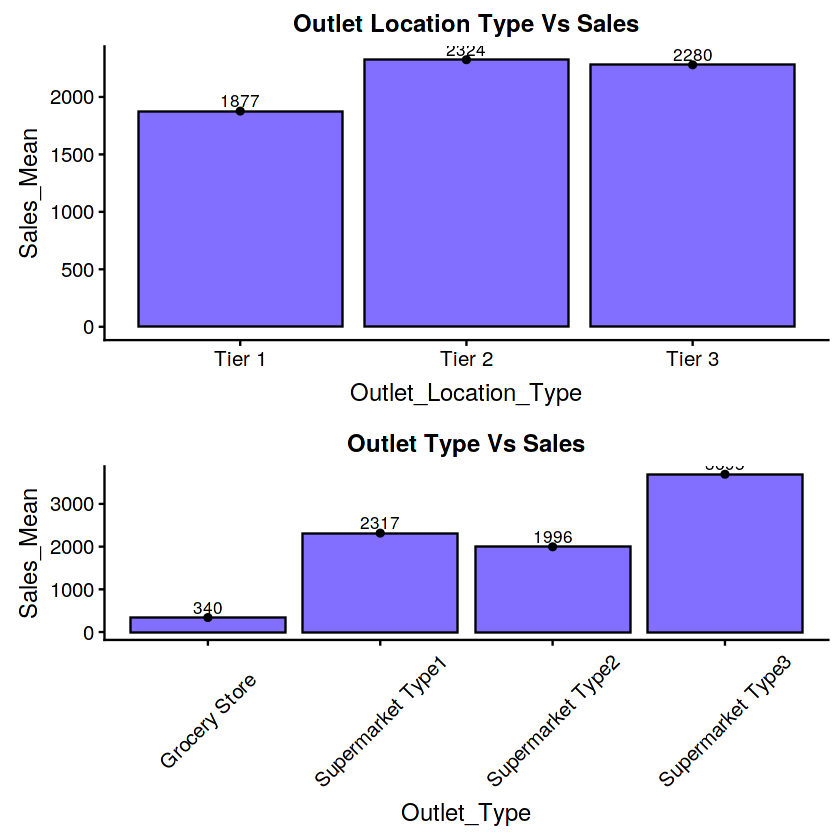

In [34]:
# Visualing Outlet_Location_Type with Mean of Item_Outlet_Sales
j6 <- ggplot(outletlocation_bysales, aes(Outlet_Location_Type, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Outlet Location Type Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

# Visualing Outlet_Type with Mean of Item_Outlet_Sales
j7 <- ggplot(outlettype_bysales, aes(Outlet_Type, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Outlet Type Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5))

plot_grid(j6,j7,nrow=2)

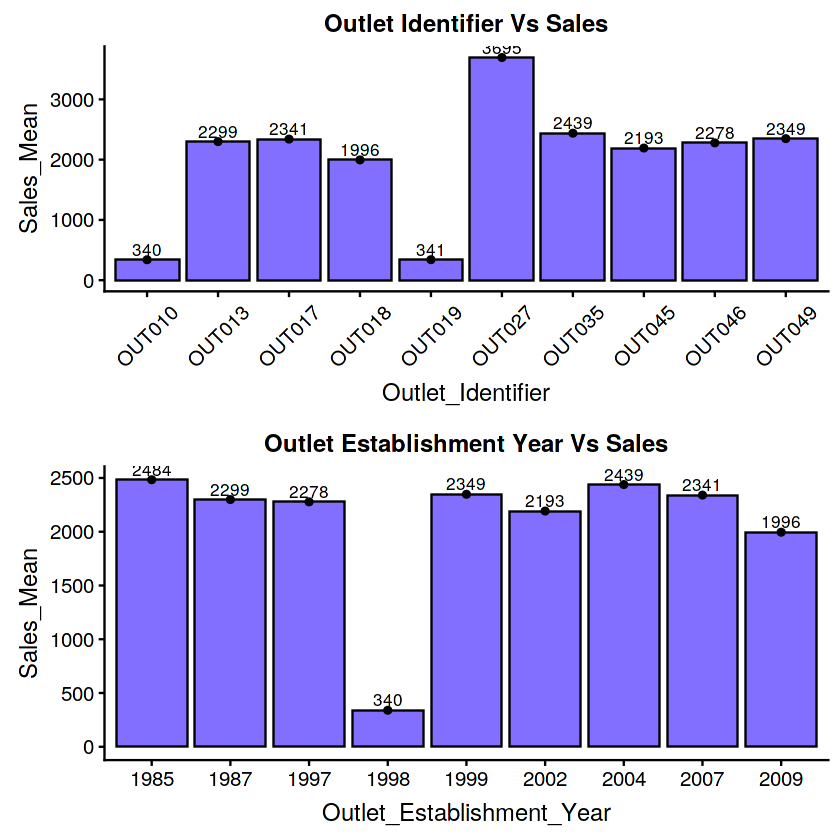

In [35]:
# Visualing Outlet_Identifier with Mean of Item_Outlet_Sales
j8 <- ggplot(outletid_bysales, aes(Outlet_Identifier, Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  ggtitle("Outlet Identifier Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5))

# Visualing Outlet_Establishment_Year with Mean of Item_Outlet_Sales
j9 <- ggplot(outletyear_bysales, aes(factor(Outlet_Establishment_Year), Sales_Mean)) + 
  geom_bar(stat='summary', fun.y='mean',fill='slateblue1',color='black') + 
  geom_point() + 
  geom_text(aes(label = ceiling(Sales_Mean)), vjust=-0.3, size=3.5) + 
  xlab('Outlet_Establishment_Year') + 
  ggtitle("Outlet Establishment Year Vs Sales") + 
  theme(plot.title = element_text(hjust = 0.5))

plot_grid(j8,j9,nrow=2)

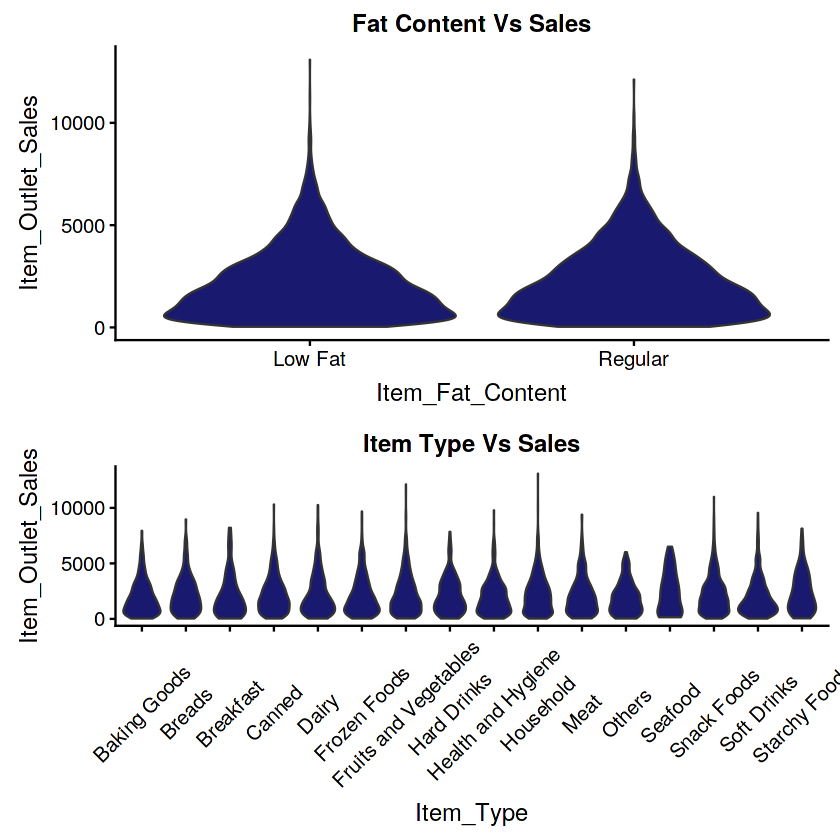

In [36]:
# Creating a violin graph for each categorical variable w.r.t distribution of Item_Outlet_Sales
g1 <- train %>% ggplot(aes(x=Item_Fat_Content, y=Item_Outlet_Sales)) + 
  geom_violin(fill='midnightblue') +
  ggtitle('Fat Content Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

g2 <- train %>% ggplot(aes(x=Item_Type, y=Item_Outlet_Sales)) +
  geom_violin(fill='midnightblue') +
  theme(axis.text.x = element_text(angle=45,vjust=0.5)) +
  ggtitle('Item Type Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

plot_grid(g1, g2, nrow = 2)

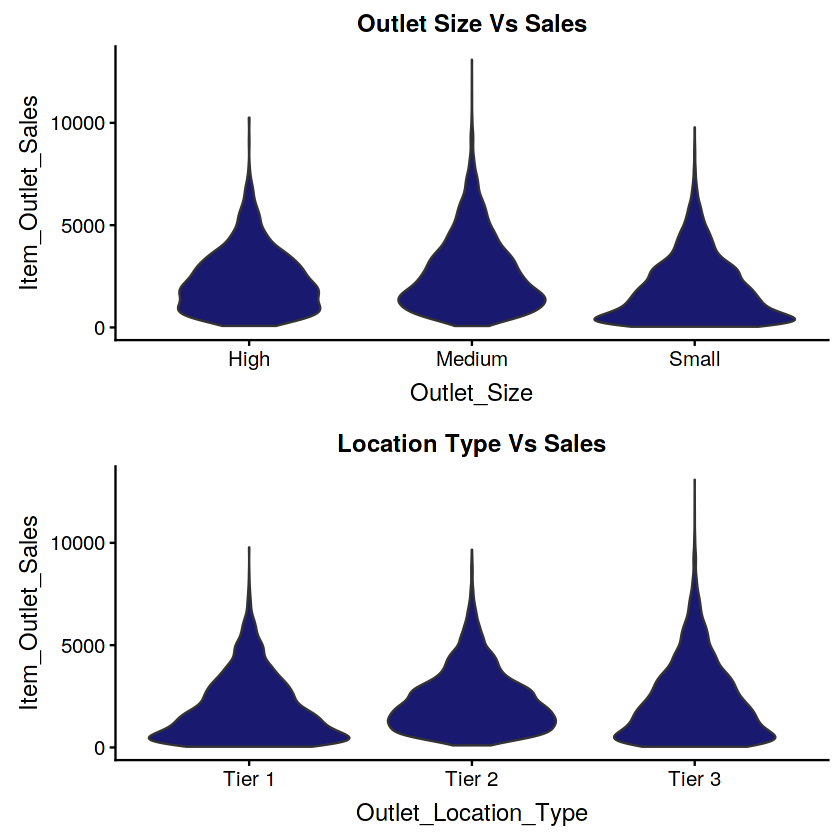

In [37]:
g3 <- train %>% ggplot(aes(x=Outlet_Size, y=Item_Outlet_Sales)) + 
  geom_violin(fill='midnightblue') +
  ggtitle('Outlet Size Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

g4 <- train %>% ggplot(aes(x=Outlet_Location_Type, y=Item_Outlet_Sales)) + 
  geom_violin(fill='midnightblue') +
  ggtitle('Location Type Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

plot_grid(g3, g4, nrow = 2)

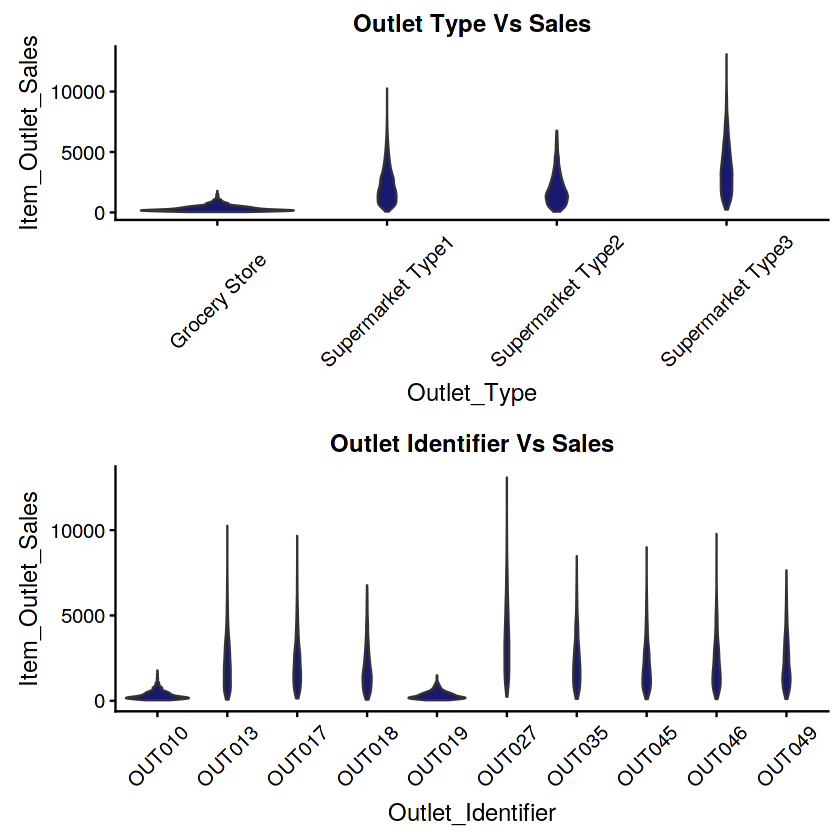

In [38]:
g5 <- train %>% ggplot(aes(x=Outlet_Type, y=Item_Outlet_Sales)) + 
  geom_violin(fill='midnightblue') + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5)) + 
  ggtitle('Outlet Type Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

g6 <- train %>% ggplot(aes(x=Outlet_Identifier, y=Item_Outlet_Sales)) + 
  geom_violin(fill='midnightblue') + 
  theme(axis.text.x = element_text(angle=45,vjust=0.5)) +
  ggtitle('Outlet Identifier Vs Sales') +
  theme(plot.title = element_text(hjust = 0.5))

plot_grid(g5, g6, nrow = 2)

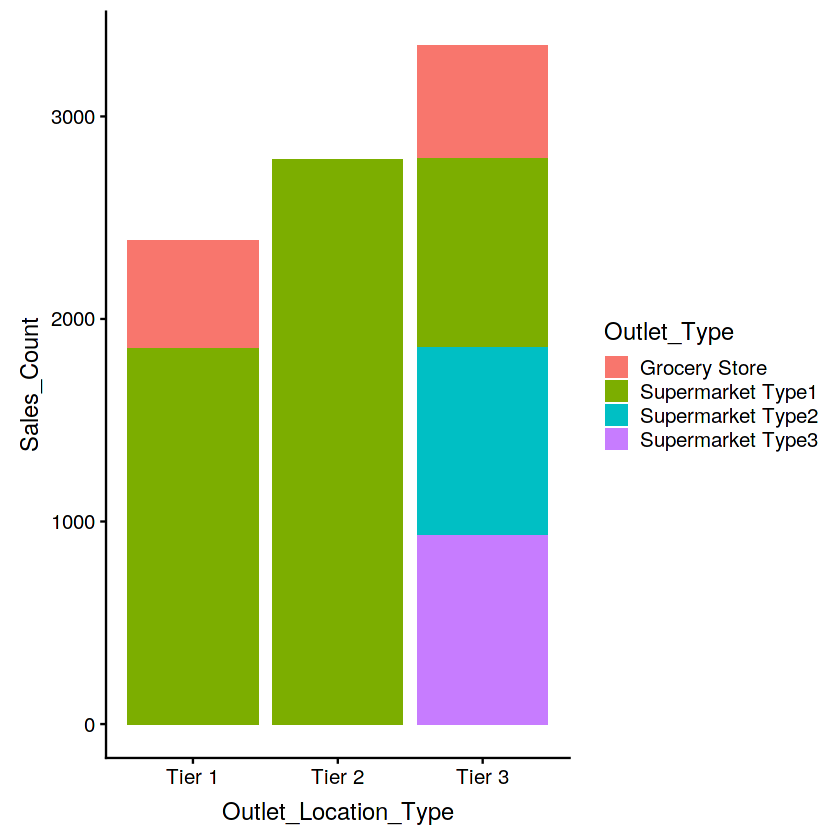

In [39]:
#Multivariate Analysis

# Outlet_Location_Type vs Outlet_Type vs Item_Outlet_Sales
a <- train %>% group_by(Outlet_Location_Type, Outlet_Type) %>% 
  summarise_at(vars(Item_Outlet_Sales), funs(Sales_Count = n()))

ggplot(a,aes(Outlet_Location_Type,Sales_Count,fill=Outlet_Type)) + geom_bar(stat='identity')


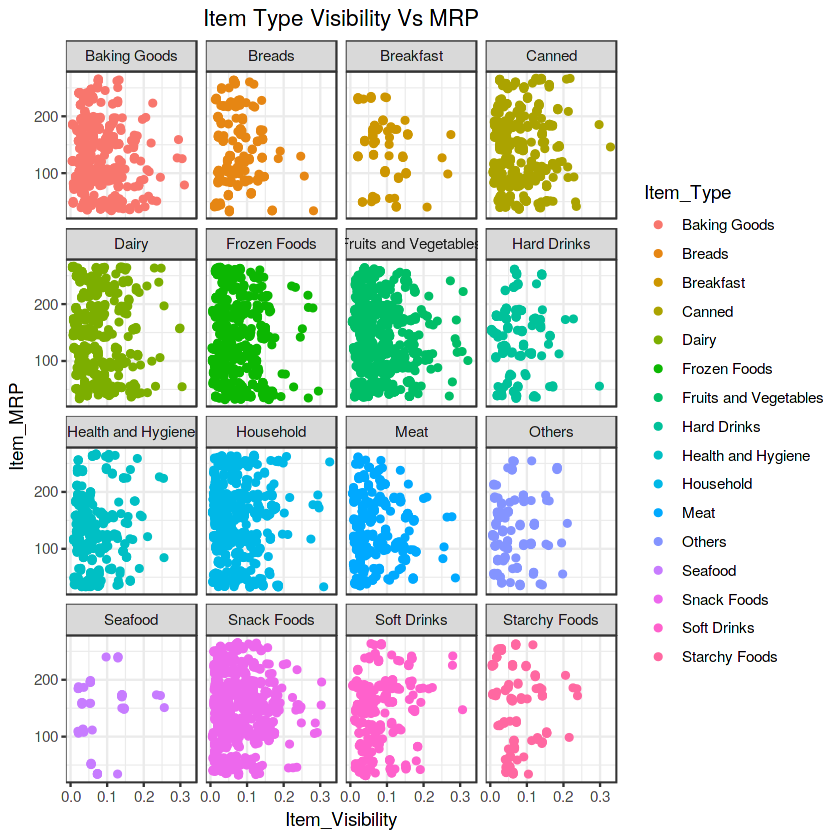

In [40]:
# Item_Visibility vs Item_MRP vs Item_Type
ggplot(train,aes(x=Item_Visibility,y=Item_MRP)) + 
  geom_point(aes(color=Item_Type)) + 
  theme_bw()+facet_wrap(~Item_Type) + 
  ggtitle('Item Type Visibility Vs MRP') + 
  theme(plot.title = element_text(hjust = 0.5))

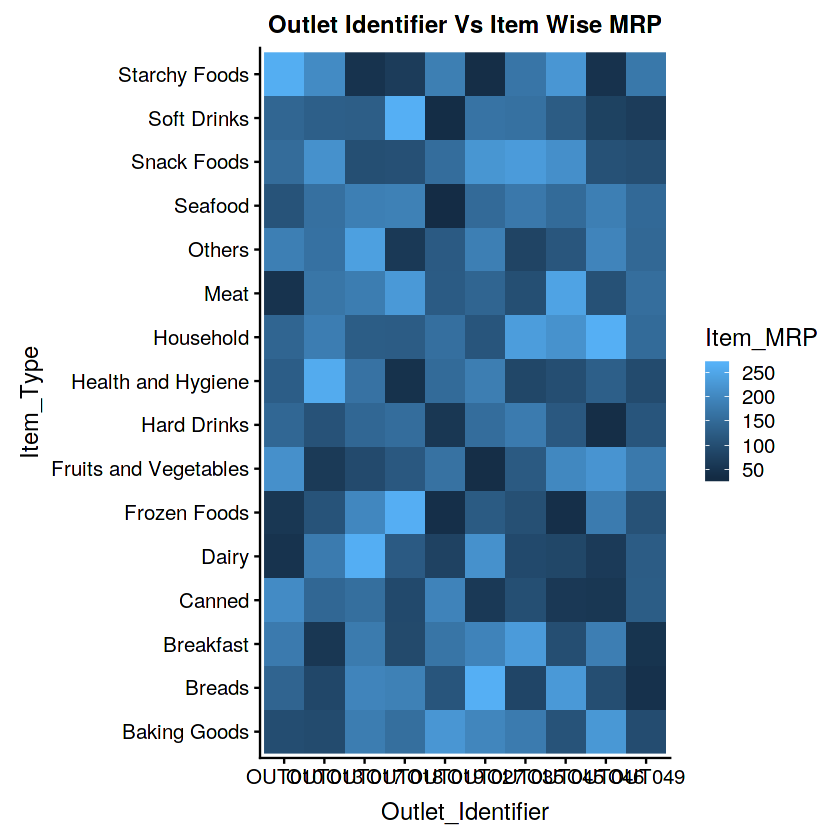

In [41]:
# Creating a heatmap
ggplot(train, aes(Outlet_Identifier, Item_Type)) +
  geom_raster(aes(fill = Item_MRP)) + 
  ggtitle('Outlet Identifier Vs Item Wise MRP') + 
  theme(plot.title = element_text(hjust = 0.5))

In [42]:
# Building the model

# Getting ready the model data
xtrain = train %>% dplyr::select(-Item_Identifier)
# To check whether it contains the NA or not
sum(is.na.data.frame(xtrain))

# Omitting the NA Values
xtrain = na.omit(xtrain)

[1] 4

In [43]:
# Creating a linear Model with Item_Outlet_Sales as target variable
linear_model = lm(Item_Outlet_Sales ~ ., data=xtrain, na.action = na.omit)

# Summarizing the model
summary(linear_model)


Call:
lm(formula = Item_Outlet_Sales ~ ., data = xtrain, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-4342.0  -678.6   -89.9   569.4  7949.3 

Coefficients: (8 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.841e+03  8.245e+01 -22.332   <2e-16 ***
Item_Weight                     9.795e-02  2.657e+00   0.037    0.971    
Item_Fat_ContentRegular         4.092e+01  2.825e+01   1.449    0.147    
Item_Visibility                -1.855e+02  2.581e+02  -0.719    0.472    
Item_TypeBreads                 5.895e+00  8.409e+01   0.070    0.944    
Item_TypeBreakfast              4.936e+00  1.166e+02   0.042    0.966    
Item_TypeCanned                 2.525e+01  6.280e+01   0.402    0.688    
Item_TypeDairy                 -4.263e+01  6.229e+01  -0.684    0.494    
Item_TypeFrozen Foods          -2.666e+01  5.892e+01  -0.452    0.651    
Item_TypeFruits and Vegetables 

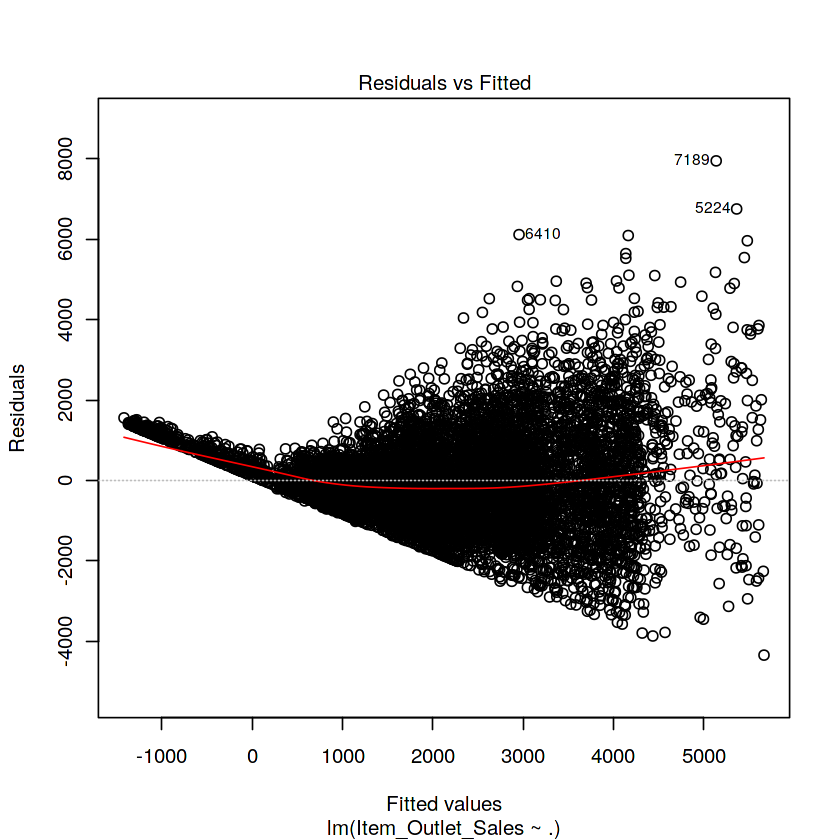

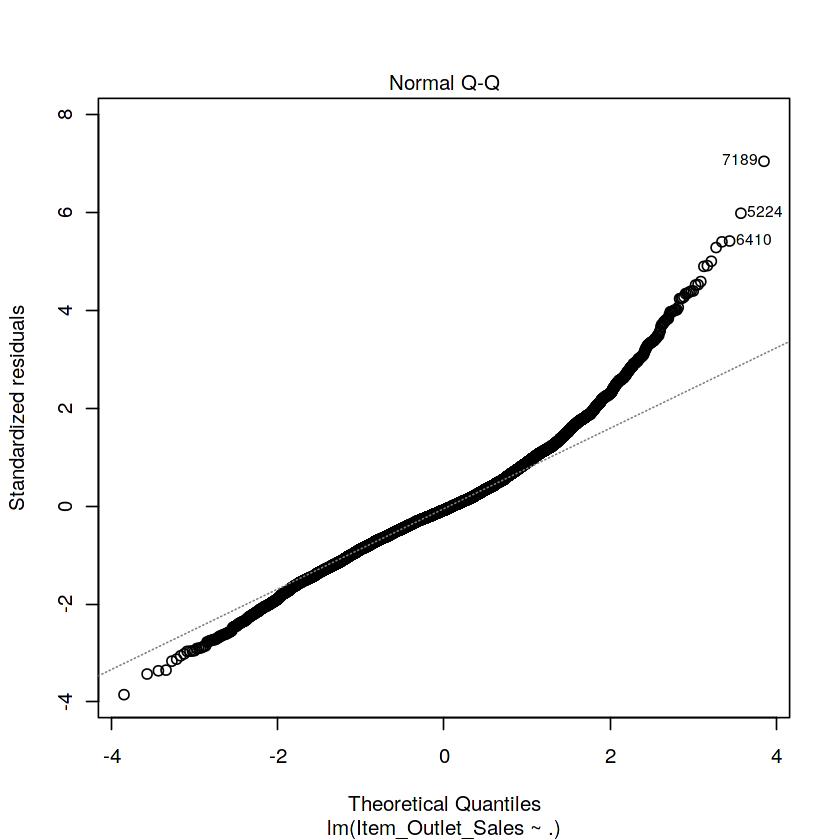

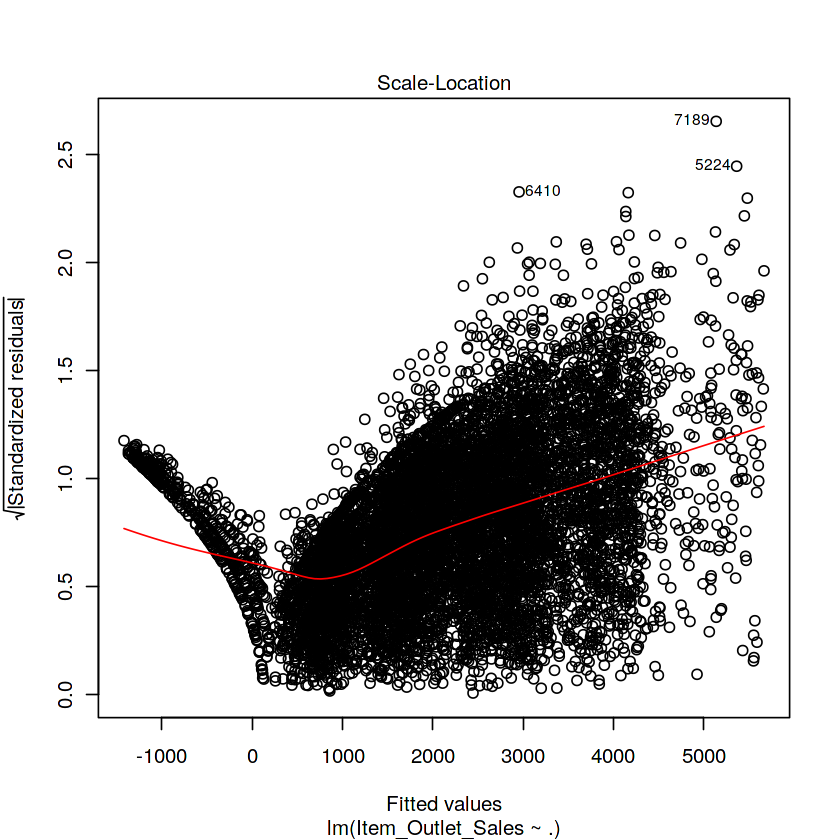

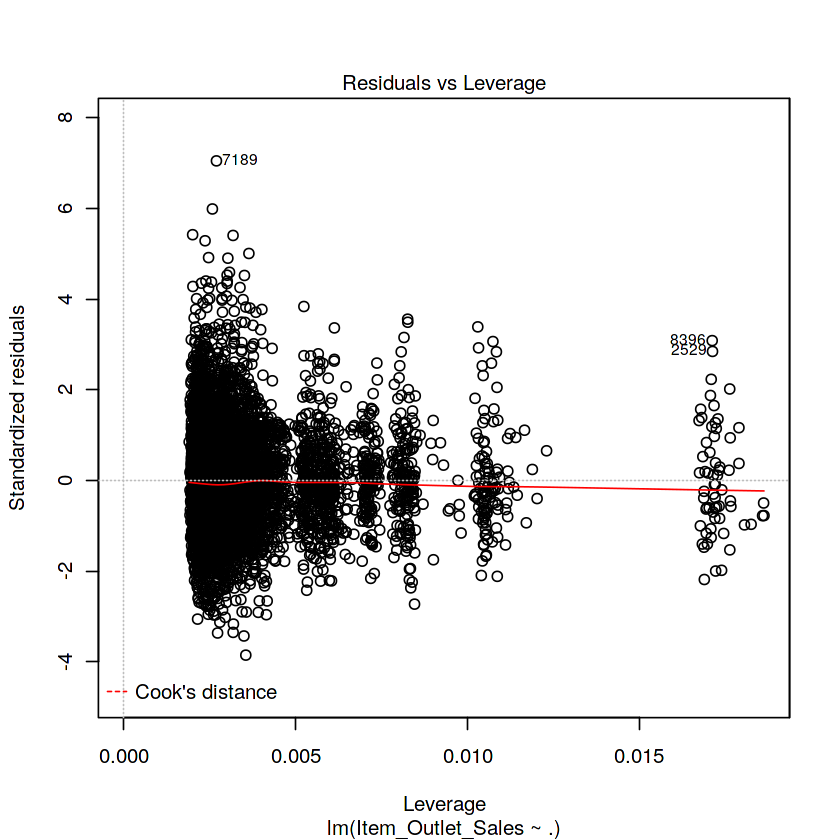

In [44]:
# Plotting the train model
plot(linear_model)

In [45]:
# Determining AIC and BIC Values
AIC(linear_model)
BIC(linear_model)

[1] 143970.4

[1] 144181.9

In [46]:
# Segregating the data into train and test (train 80%, test 20%)
trainingRowIndex <- sample(1:nrow(xtrain), 0.8*nrow(xtrain))
trainingData <- xtrain[trainingRowIndex, ]
testData  <- xtrain[-trainingRowIndex, ]

In [47]:
# Building a model in train data
lmMod <- lm(Item_Outlet_Sales ~ ., data=trainingData, na.action = na.omit)

# Predicting the test data
distPred <- predict(lmMod, data=testData)

# Summarizing the model
summary(lmMod)


Call:
lm(formula = Item_Outlet_Sales ~ ., data = trainingData, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-4334.6  -675.5   -85.4   569.9  6752.7 

Coefficients: (8 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1833.2190    92.0581 -19.914   <2e-16 ***
Item_Weight                       -0.5308     2.9579  -0.179    0.858    
Item_Fat_ContentRegular           25.2298    31.5034   0.801    0.423    
Item_Visibility                  -96.6909   289.1269  -0.334    0.738    
Item_TypeBreads                  -30.1919    93.9198  -0.321    0.748    
Item_TypeBreakfast               112.9946   132.1847   0.855    0.393    
Item_TypeCanned                   11.8793    70.1231   0.169    0.865    
Item_TypeDairy                   -76.5166    69.4833  -1.101    0.271    
Item_TypeFrozen Foods            -34.6401    66.0882  -0.524    0.600    
Item_TypeFruits and Veget

In [48]:
# Comparing actual values and predicted values
actuals_preds <- data.frame(cbind(actuals=testData$Item_Outlet_Sales, predicted=distPred))
correlation_accuracy <- cor(actuals_preds)
head(actuals_preds)

Warning message in cbind(actuals = testData$Item_Outlet_Sales, predicted = distPred):
“number of rows of result is not a multiple of vector length (arg 1)”

,actuals,predicted
,<dbl>,<dbl>
8379,443.4228,1964.014
325,732.3800,1795.737
7037,4064.0432,3827.056
1258,1587.2672,4010.132
5480,308.9312,2925.646
6200,2741.7644,2687.768


In [49]:
# Determining the RMSE Value of Model
mse_lm <- mse(distPred, testData$Item_Outlet_Sales)
cat('Linear model MSE: ', sqrt(mse_lm))

Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”

Linear model MSE:  2134.881